##**Machine Learning for Kalbe Nutritionals**

Objective : Customer Segmentation with K-Means Clustering

###**Attribute information:**

1. Customer

- CustomerID : No Unik Customer
- Age : Usia Customer
- Gender : 0 Wanita, 1 Pria
- Marital Status : Married, Single (Blm menikah/Pernah menikah)
- Income : Pendapatan per bulan dalam jutaan rupiah


2. Store

- StoreID : Kode Unik Store
- StoreName : Nama Toko
- GroupStore : Nama group
- Type : Modern Trade, General Trade
- Latitude : Kode Latitude
- Longitude : Kode Longitude


3. Product

- ProductID : Kode Unik Product
- Product Name : Nama Product
- Price : Harga dlm rupiah


4. Transaction

- TransactionID : Kode Unik Transaksi
- Date : Tanggal transaksi
- Qty : Jumlah item yang dibeli
- Total Amount : Price x Qty





### Import Library

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')

### Load Dataset

In [ ]:
df_cus = pd.read_csv('Customer.csv')
df_str = pd.read_csv('Store.csv')
df_prod = pd.read_csv('Product.csv')
df_trans = pd.read_csv('Transaction.csv')

### Data Preprocessing

#### Customer

In [ ]:
df_cus = df_cus.drop_duplicates()

In [ ]:
#Looking at the first 5 rows of the dataset
df_cus.head()

,CustomerID,Age,Gender,MaritalStatus,Income
0,1,55,1,Married,5.12
1,2,60,1,Married,6.23
2,3,32,1,Married,9.17
3,4,31,1,Married,4.87
4,5,58,1,Married,3.57


In [ ]:
#Looking at the last 5 rows of the dataset
df_cus.tail()

,CustomerID,Age,Gender,MaritalStatus,Income
442,443,33,1,NaN,9.28
443,444,53,0,Married,15.31
444,445,51,0,Married,14.48
445,446,57,0,Married,7.81
446,447,54,1,Married,20.37


In [ ]:
#How many rows and columns in the dataset?
df_cus.shape

(447, 5)

In [ ]:
#Labeling categorical data
status = {
    "Single": 0,
    "Married": 1
}

df_cus['MaritalStatus'] = df_cus['MaritalStatus'].map(status)

In [ ]:
df_cus.head()

,CustomerID,Age,Gender,MaritalStatus,Income
0,1,55,1,1.0,5.12
1,2,60,1,1.0,6.23
2,3,32,1,1.0,9.17
3,4,31,1,1.0,4.87
4,5,58,1,1.0,3.57


In [ ]:
#General information of the dataset
df_cus.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 447 entries, 0 to 446
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CustomerID     447 non-null    int64  
 1   Age            447 non-null    int64  
 2   Gender         447 non-null    int64  
 3   MaritalStatus  444 non-null    float64
 4   Income         447 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 21.0 KB


##### Handling Missing Values

In [ ]:
#Checking for missing values
df_cus.isnull().sum()

CustomerID       0
Age              0
Gender           0
MaritalStatus    3
Income           0
dtype: int64

In [ ]:
#filling missing data
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean', missing_values=np.nan)
imputer = imputer.fit(df_cus[['MaritalStatus']])
df_cus['MaritalStatus'] = imputer.transform(df_cus[['MaritalStatus']])

In [ ]:
#Checking if the data is still missing
df_cus.isnull().sum()

CustomerID       0
Age              0
Gender           0
MaritalStatus    0
Income           0
dtype: int64

#### Store

In [ ]:
df_str = df_str.drop_duplicates()

In [ ]:
#Looking at the first 5 rows of the dataset
df_str.head()

,StoreID,StoreName,GroupStore,Type,Latitude,Longitude
0,1,Prima Tendean,Prima,Modern Trade,-6.200000,106.816666
1,2,Prima Kelapa Dua,Prima,Modern Trade,-6.914864,107.608238
2,3,Prima Kota,Prima,Modern Trade,-7.797068,110.370529
3,4,Gita Ginara,Gita,General Trade,-6.966667,110.416664
4,5,Bonafid,Gita,General Trade,-7.250445,112.768845


In [ ]:
#Looking at the last 5 rows of the dataset
df_str.tail()

,StoreID,StoreName,GroupStore,Type,Latitude,Longitude
9,10,Harapan Baru,Harapan Baru,General Trade,3.597031,98.678513
10,11,Sinar Harapan,Prestasi,General Trade,0.533505,101.447403
11,12,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
12,13,Buana,Buana,General Trade,-1.269160,116.825264
13,14,Priangan,Priangan,Modern Trade,-5.450000,105.266670


In [ ]:
#How many rows and columns in the dataset?
df_str.shape

(14, 6)

In [ ]:
#General information of the dataset
df_str.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   StoreID     14 non-null     int64  
 1   StoreName   14 non-null     object 
 2   GroupStore  14 non-null     object 
 3   Type        14 non-null     object 
 4   Latitude    14 non-null     float64
 5   Longitude   14 non-null     float64
dtypes: float64(2), int64(1), object(3)
memory usage: 784.0+ bytes


##### Handling Missing Values

In [ ]:
#Checking for missing values
df_str.isnull().sum()

StoreID       0
StoreName     0
GroupStore    0
Type          0
Latitude      0
Longitude     0
dtype: int64

#### Product

In [ ]:
df_prod = df_prod.drop_duplicates()

In [ ]:
#Looking at the first 5 rows of the dataset
df_prod.head()

,ProductID,ProductName,Price
0,P1,Choco Bar,8800
1,P2,Ginger Candy,3200
2,P3,Crackers,7500
3,P4,Potato Chip,12000
4,P5,Thai Tea,4200


In [ ]:
#Looking at the last 5 rows of the dataset
df_str.tail()

,StoreID,StoreName,GroupStore,Type,Latitude,Longitude
9,10,Harapan Baru,Harapan Baru,General Trade,3.597031,98.678513
10,11,Sinar Harapan,Prestasi,General Trade,0.533505,101.447403
11,12,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
12,13,Buana,Buana,General Trade,-1.269160,116.825264
13,14,Priangan,Priangan,Modern Trade,-5.450000,105.266670


In [ ]:
#How many rows and columns in the dataset?
df_prod.shape

(10, 3)

In [ ]:
#General information of the dataset
df_prod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ProductID    10 non-null     object
 1   ProductName  10 non-null     object
 2   Price        10 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 320.0+ bytes


##### Handling Missing Values

In [ ]:
#Checking for missing values
df_prod.isnull().sum()

ProductID      0
ProductName    0
Price          0
dtype: int64

#### Transaction

In [ ]:
df_trans = df_trans.drop_duplicates()

In [ ]:
#Looking at the first 5 rows of the dataset
df_trans.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
0,TR11369,328,1/1/2022,P3,7500,4,30000,12
1,TR16356,165,1/1/2022,P9,10000,7,70000,1
2,TR1984,183,1/1/2022,P1,8800,4,35200,4
3,TR35256,160,1/1/2022,P1,8800,7,61600,4
4,TR41231,386,1/1/2022,P9,10000,1,10000,4


In [ ]:
#Looking at the last 5 rows of the dataset
df_trans.tail()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
5015,TR54423,243,31/12/2022,P10,15000,5,75000,3
5016,TR5604,271,31/12/2022,P2,3200,4,12800,9
5017,TR81224,52,31/12/2022,P7,9400,6,56400,9
5018,TR85016,18,31/12/2022,P8,16000,3,48000,13
5019,TR85684,55,31/12/2022,P8,16000,1,16000,6


In [ ]:
#How many rows and columns in the dataset?
df_trans.shape

(5020, 8)

In [ ]:
#General information of the dataset
df_trans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5020 entries, 0 to 5019
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TransactionID  5020 non-null   object
 1   CustomerID     5020 non-null   int64 
 2   Date           5020 non-null   object
 3   ProductID      5020 non-null   object
 4   Price          5020 non-null   int64 
 5   Qty            5020 non-null   int64 
 6   TotalAmount    5020 non-null   int64 
 7   StoreID        5020 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 353.0+ KB


##### Handling Missing Values

In [ ]:
#Checking for missing values
df_trans.isnull().sum()

TransactionID    0
CustomerID       0
Date             0
ProductID        0
Price            0
Qty              0
TotalAmount      0
StoreID          0
dtype: int64

### Merging Dataset

In [ ]:
df1 = df_trans.merge(df_cus, on='CustomerID', how='inner')
df2 = df1.merge(df_str, on='StoreID', how='inner')
df = df2.merge(df_prod, on='ProductID', how='inner')

In [ ]:
df.head()

,TransactionID,CustomerID,Date,ProductID,Price_x,Qty,TotalAmount,StoreID,Age,Gender,MaritalStatus,Income,StoreName,GroupStore,Type,Latitude,Longitude,ProductName,Price_y
0,TR11369,328,1/1/2022,P3,7500,4,30000,12,36,0,1.0,10.53,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554,Crackers,7500
1,TR89318,183,17/07/2022,P3,7500,1,7500,12,27,1,0.0,0.18,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554,Crackers,7500
2,TR9106,123,26/09/2022,P3,7500,4,30000,12,34,0,1.0,4.36,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554,Crackers,7500
3,TR4331,335,8/1/2022,P3,7500,3,22500,12,29,1,0.0,4.74,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554,Crackers,7500
4,TR6445,181,10/1/2022,P3,7500,4,30000,12,33,1,1.0,9.94,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554,Crackers,7500


In [ ]:
df_clus = df.groupby('CustomerID').agg({'TransactionID': 'count', 'Qty': 'sum', 'TotalAmount': 'sum'}).reset_index()

# Display the first 10 rows of the new_data DataFrame
df_clus.head()

,CustomerID,TransactionID,Qty,TotalAmount
0,1,17,60,623300
1,2,13,57,392300
2,3,15,56,446200
3,4,10,46,302500
4,5,7,27,268600


In [ ]:
#Describing the dataset
df_clus.describe()

,CustomerID,TransactionID,Qty,TotalAmount
count,447.000000,447.000000,447.000000,447.000000
mean,224.000000,11.230425,40.930649,362512.304251
std,129.182042,3.245302,12.756679,124634.279184
min,1.000000,3.000000,10.000000,92100.000000
25%,112.500000,9.000000,32.000000,271750.000000
50%,224.000000,11.000000,40.000000,354200.000000
75%,335.500000,14.000000,50.000000,441200.000000
max,447.000000,21.000000,79.000000,846700.000000


## Exploratory Data Analysis

In [ ]:
#Describing the dataset
df.describe()

,CustomerID,Price_x,Qty,TotalAmount,StoreID,Age,Gender,MaritalStatus,Income,Latitude,Longitude,Price_y
count,5020.000000,5020.000000,5020.000000,5020.000000,5020.000000,5020.000000,5020.000000,5020.000000,5020.000000,5020.000000,5020.000000,5020.000000
mean,221.263745,9684.800797,3.644622,32279.482072,7.489841,40.003586,0.452988,0.759501,8.659839,-2.942236,109.600789,9684.800797
std,129.672955,4600.708780,1.855295,19675.462455,4.028502,12.834719,0.497835,0.425586,6.507063,4.323225,8.357593,4600.708780
min,1.000000,3200.000000,1.000000,7500.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-7.797068,95.323753,3200.000000
25%,108.000000,4200.000000,2.000000,16000.000000,4.000000,30.000000,0.000000,1.000000,4.360000,-6.914864,104.756554,4200.000000
50%,221.000000,9400.000000,3.000000,28200.000000,7.000000,39.000000,0.000000,1.000000,7.810000,-5.135399,110.370529,9400.000000
75%,332.000000,15000.000000,5.000000,47000.000000,11.000000,51.000000,1.000000,1.000000,10.780000,0.533505,114.590111,15000.000000
max,447.000000,18000.000000,10.000000,88000.000000,14.000000,72.000000,1.000000,1.000000,71.300000,5.548290,128.190643,18000.000000


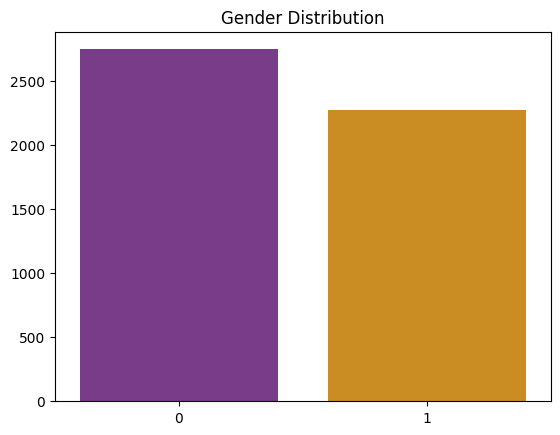

In [ ]:
data_plot  = df['Gender'].value_counts().to_list()
label_plot = df['Gender'].value_counts().index.to_list()

title = 'Gender Distribution'

plot       = sns.barplot(data = df, x = label_plot, y = data_plot, palette = 'CMRmap')
plot_title = plt.title(title)

plt.show()

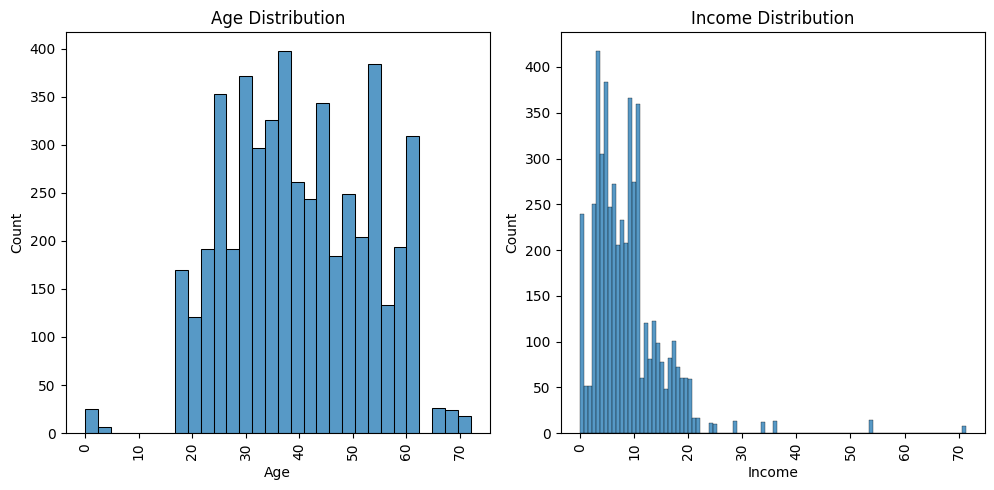

In [ ]:
column_name_list_num = ['Age', 'Income']

num_cols = len(column_name_list_num)
num_rows = (num_cols + 2) // 3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15,5*num_rows))
axs = axs.flatten()

#Barplot for each variables
for i, var in enumerate (column_name_list_num):
  sns.histplot(x=var, data=df, palette = 'CMRmap', ax=axs[i])
  axs[i].set_title(var + " " + "Distribution")
  axs[i].tick_params(axis='x', rotation=90)

#Removes extra empty subplots
if num_cols < len(axs):
  for i in range(num_cols, len(axs)):
    fig.delaxes(axs[i])

fig.tight_layout()
plt.show()

## Modelling

In [ ]:
#Used feature
feature = ['TransactionID', 'Qty', 'TotalAmount']
x = df_clus[feature].values

In [ ]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_sc = pd.DataFrame(sc.fit_transform(x))

In [ ]:
#Elbow method
wcss = []
for n in range(1,11):
  kmeans = KMeans(n_clusters = n, init = 'k-means++')
  kmeans.fit(x_sc)
  wcss.append(kmeans.inertia_)

In [ ]:
print(wcss)

[1340.9999999999995, 543.253972384633, 316.9683275120808, 238.55313216419233, 192.1671315298162, 169.87395181060867, 155.67892510737903, 140.92298103800783, 131.14269520876337, 121.96688466923226]


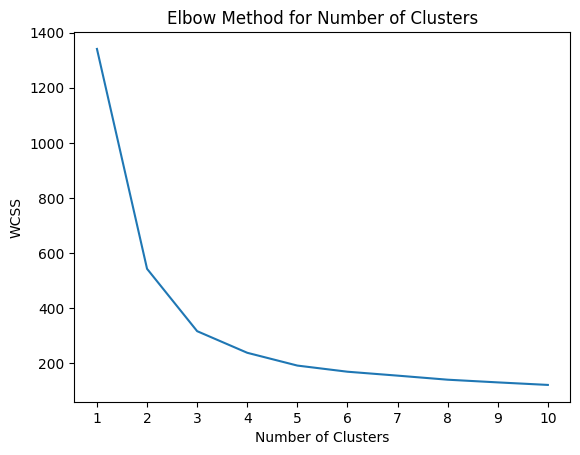

In [ ]:
plt.plot(range(1,11), wcss)
plt.xticks(range(1,11))
plt.title('Elbow Method for Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
#Creating K-Means Clustering model
kmeans = KMeans(n_clusters = 4, init = 'k-means++')
kmeans.fit(x_sc)

KMeans(n_clusters=4)

In [ ]:
Cluster = kmeans.fit_predict(x_sc)

In [ ]:
df_clus['Cluster'] = kmeans.labels_
df_clus.head()

,CustomerID,TransactionID,Qty,TotalAmount,Cluster
0,1,17,60,623300,1
1,2,13,57,392300,3
2,3,15,56,446200,3
3,4,10,46,302500,0
4,5,7,27,268600,2


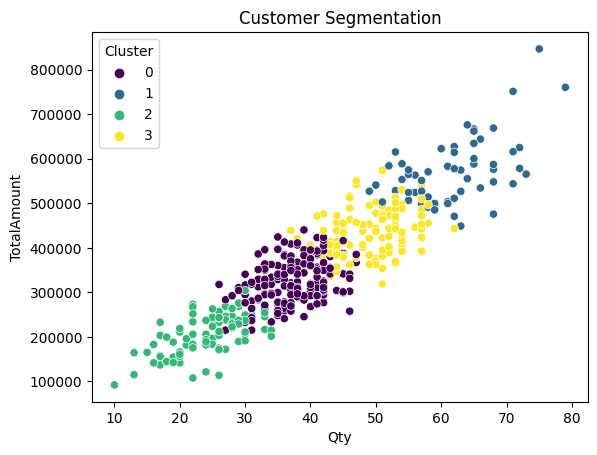

In [ ]:
title = 'Customer Segmentation'
plot = sns.scatterplot(data=df_clus, x='Qty', y='TotalAmount', hue='Cluster', palette='viridis')
plot_title = plt.title(title)

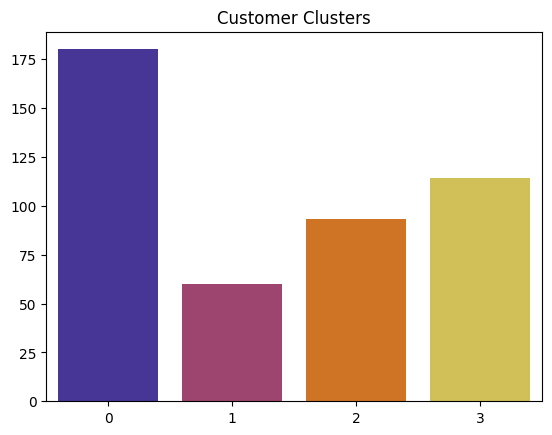

In [ ]:
data_plot  = df_clus['Cluster'].value_counts().to_list()
label_plot = df_clus['Cluster'].value_counts().index.to_list()

title = 'Customer Clusters'

plot       = sns.barplot(x = label_plot, y = data_plot, palette = 'CMRmap')
plot_title = plt.title(title)

plt.show()

In [ ]:
df_clus['Cluster'].value_counts()

0    180
3    114
2     93
1     60
Name: Cluster, dtype: int64

In [ ]:
display(df_clus.groupby('Cluster').agg(['mean']))

,CustomerID,TransactionID,Qty,TotalAmount
,mean,mean,mean,mean
Cluster,,,,
0,223.522222,10.427778,37.350000,325663.333333
1,210.450000,16.316667,61.650000,572100.000000
2,254.064516,7.021505,24.505376,208283.870968
3,207.359649,13.254386,49.078947,436203.508772


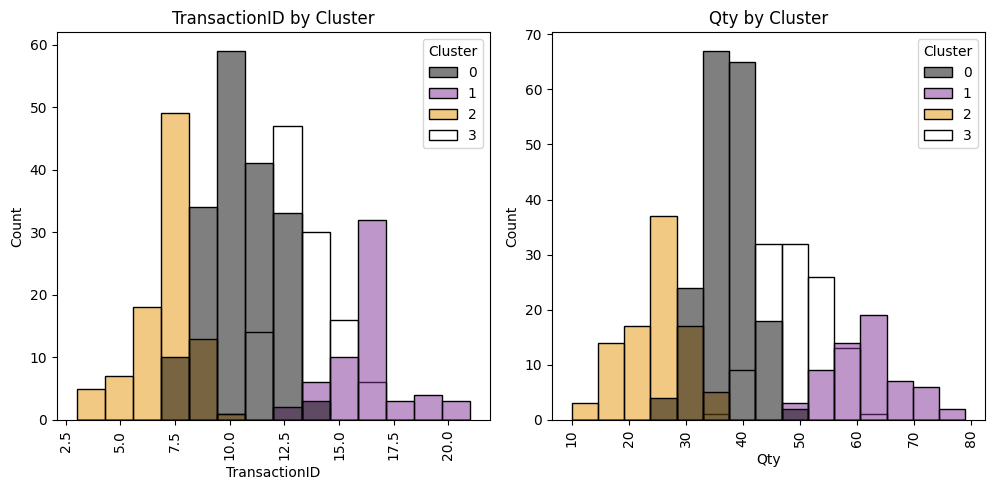

In [ ]:
column_name_list_num = ['TransactionID', 'Qty']

num_cols = len(column_name_list_num)
num_rows = (num_cols + 2) // 3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15,5*num_rows))
axs = axs.flatten()

#Barplot for each variables
for i, var in enumerate (column_name_list_num):
  sns.histplot(x=var, hue = 'Cluster', data=df_clus, palette = 'CMRmap', ax=axs[i])
  axs[i].set_title(var + " " + "by Cluster")
  axs[i].tick_params(axis='x', rotation=90)

#Removes extra empty subplots
if num_cols < len(axs):
  for i in range(num_cols, len(axs)):
    fig.delaxes(axs[i])

fig.tight_layout()
plt.show()